<a href="https://colab.research.google.com/github/ParbatiDebbarma/Netflix-Data-Analysis/blob/main/Netflix_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case:Netflix - Data Exploration and Visualization**

**1.Business Problem:**

**Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries**

**Dataset:**

---



The dataset consists of a list of all the TV shows/movies available on Netflix:

*   **Show_id:** Unique ID for every Movie / TV Show
*   **Type:** Identifier - A Movie or TV Show
*   **Title:** Title of the Movie / TV Show
*   **Director:** Director of the Movie
*   **Cast:** Actors involved in the movie/show
*   **Country:** Country where the movie/show was produced
*   **Date_added:** Date it was added on Netflix
*   **Release_year:** Actual Release year of the movie/show
*   **Rating:** TV Rating of the movie/show
*   **Duration:** Total Duration - in minutes or number of seasons
*   **Listed_in**: Genre
*   **Description**: The summary descriptionList item






**Objective:**

---



To explore the dataset by performing EDA and to provide business insights and recommendation for the dataset

In [ ]:
#importing all modules for the analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/netflix.csv')  #prints the first five records in the Dataframe
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape  #Returns the number of rows and columns in the dataframe

(8807, 12)

In [ ]:
df.info() #provides a summary of the dataframe including the datatype of all the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique() #returns the number of unique values in each column of the DataFrame.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df.describe(include = object) #df.describe() provides summary statistics for numerical columns in the DataFrame

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
df.describe() #df.describe(include=object) provides summary statistics for categorical (object) columns.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000




*   The dataset contains 8807 entries, with each entry representing a unique title.
*   There are 6131 movies and 2676 TV shows
*   Rajiv Chilaka directed the most number of movies/TV shows with a total of 19 movies/TV Shows.
*   The most common country of origin is the United States (2818 times)
*   The most frequent rating is TV-MA (3207 times).
*   The "Dramas, International Movies" category is the most popular genre, appearing 362 times.

In [ ]:
df.duplicated().value_counts() #returns the counts of duplicate and non-duplicate rows in the DataFrame, showing how many times each (True for duplicates, False for unique rows) occurs.

False    8807
Name: count, dtype: int64

There are no duplicate entries in the dataset

**2. Observation and Analysis**

---



In [ ]:
for i in ['type','release_year','rating','duration']:
    print(f'The unique values of {i} column are')
    print(df[i].unique())
    print('-'*50)

The unique values of type column are
['Movie' 'TV Show']
--------------------------------------------------
The unique values of release_year column are
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
--------------------------------------------------
The unique values of rating column are
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
--------------------------------------------------
The unique values of duration column are
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '

The above written code iterates through the specified columns ('type', 'release_year', 'rating', 'duration') and prints the unique values for each column separated by a line of dashes

In [ ]:
for i in ['type','release_year','rating','duration']:
    print(f'Value count in {i} column are: ')
    print(df[i].value_counts())
    print('-'*50)

Value count in type column are: 
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
--------------------------------------------------
Value count in release_year column are: 
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
--------------------------------------------------
Value count in rating column are: 
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
--------------------------------------------------
Value count in duration column are: 
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 mi

The code iterates through the specified columns ('type', 'release_year', 'rating', 'duration') in the DataFrame and prints the value counts for each column, followed by a separator line for clarity.

**2.1.Data Cleaning**

---



In [ ]:
df.isnull().sum() #Returns the total count of missing values for each column in the DataFrame.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The dataset shows that out of 8807 entries


*   The "director" column has the highest number of missing values (2634),
*   Followed by "cast" (825) and "country" (831).
*   Other columns like "date_added," "rating," and "duration" have fewer missing values (10, 4, and 3 respectively)
*   While "show_id," "type," "title," "release_year," "listed_in," and "description" have no missing values.

In [ ]:
df['duration'].isnull().sum()

3

*   The provided data shows that the "duration" column has only NaN values,
indicating that all entries are missing duration information in the correct column.

*   Instead, the "rating" column contains the durations (74 min, 84 min, and 66 min), suggesting that duration values have been incorrectly recorded in the "rating" column.

In [ ]:
indices = df[df['duration'].isnull()].index #Finding the indices of the null values in the ‘duration’ column
indices

Index([5541, 5794, 5813], dtype='int64')

In [ ]:
df.loc[indices] = df.loc[indices].fillna(method = 'ffill' , axis = 1) #This code uses forward filling (method='ffill') along rows (axis=1) to fill missing values in the specified indices

In [ ]:
df.loc[indices ,'rating'] = 'Not Available'  #Assigns the value 'Not Available' to the 'rating' column for specified indices

In [ ]:
df.iloc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


Now,

*   The duration column contains the duration value
*   The rating column has also been assigned with the value “Not Available”

Similarly filling the missing/null values for the rating column

---



In [ ]:
indices_rat = df[df['rating'].isnull()].index #Finding the indices of the null values in the ‘rating’ column
indices_rat

Index([5989, 6827, 7312, 7537], dtype='int64')

In [ ]:
df.loc[indices_rat ,'rating'] = 'Not Available' #Assigns the value 'Not Available' to the 'rating' column for specified indices

In [ ]:
df.iloc[indices_rat]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['rating'].unique() #returns an array of unique values found in the 'rating' column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [ ]:
df['rating'].value_counts() # Returns the frequency of each unique value in the 'rating' column

rating
TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
UR                  3
Name: count, dtype: int64

2.1.1Fixing the country column

---



In [ ]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

The 'country' column contains multiple countries separated by commas. Splitting this column is useful to analyze or count occurrences of each country individually for  precise data visualization by ensuring each country is represented as a separate data point.

Let's create a dataframe which will store the resulting DataFrame after performing a series of transformations.

In [ ]:
country_2 = (df[['show_id', 'type', 'country']] #selected the required columns
        .dropna() #drop any row containing the NaN values
        .assign(country=lambda x: x['country'].str.split(',')) #Split the 'country' column by commas, creating lists of countries
        .explode('country') #explode the lists of countries into separate rows
        .assign(country=lambda x: x['country'].str.strip()) #remove leading/trailing whitespace from each country
        .query('country != ""')) #remove any rows where the country is empty


This transforms the data so that each show_id and its type is listed with each country it is associated with on a separate row, facilitating accurate analysis of the country data

In [ ]:
country_2

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_2['country'].nunique() #now we got the number of unique countries

122

In [ ]:
country_2.isnull().sum()

show_id    0
type       0
country    0
dtype: int64

we have no null values in the new country dataframe

2.1.2. Fixing the director column

---



In [ ]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [ ]:
dir_2 = (df[['show_id', 'type', 'director']]
        .dropna()
        .assign(director=lambda x: x['director'].str.split(','))
        .explode('director')
        .assign(director=lambda x: x['director'].str.strip())
        .query('director != ""'))

In [ ]:
dir_2

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [ ]:
dir_2['director'].nunique()

4993

In [ ]:
dir_2.isnull().sum()

show_id     0
type        0
director    0
dtype: int64

There are 4993 unique directors and there are no null values in the new directors dataframe

2.1.3. Fixing the Cast column


---


In [ ]:
df['cast'].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [ ]:
cast_2 = (df[['show_id', 'type', 'cast']]
        .dropna()
        .assign(cast=lambda x: x['cast'].str.split(','))
        .explode('cast')
        .assign(cast=lambda x: x['cast'].str.strip())
        .query('cast != ""'))

In [ ]:
cast_2

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
cast_2['cast'].nunique() #number of actors on netflix

36439

In [ ]:
cast_2.isnull().sum()

show_id    0
type       0
cast       0
dtype: int64

There are no null values in the new cast dataframe

2.1.4. Fixing the listed_in column

---



In [ ]:
listed_2 = (df[['show_id', 'type', 'listed_in']]
        .dropna()
        .assign(listed_in=lambda x: x['listed_in'].str.split(','))
        .explode('listed_in')
        .assign(listed_in=lambda x: x['listed_in'].str.strip())
        .query('listed_in != ""'))

In [ ]:
listed_2

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
listed_2['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

**2.2. Changing the datatype of the date_added column.**

---



In [ ]:
# dropping rows from a the DataFrame where the values in the 'date_added' column are missing (NaN)
df.drop(df.loc[df['date_added'].isna()].index , axis = 0, inplace = True)
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

Changing date_added column from string to datetime object (format =␣year-month-day)

In [ ]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y")
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

Extracting the Year and month information for future analysis

In [ ]:
df['Year'] = df['date_added'].dt.year
df['Month'] = df['date_added'].dt.month

In [ ]:
df[['date_added' , 'Year' , 'Month']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_added  8797 non-null   datetime64[ns]
 1   Year        8797 non-null   int32         
 2   Month       8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce') #converting datatype of 'release year' from object type to integer

In [ ]:
df[['release_year']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   release_year  8797 non-null   int64
dtypes: int64(1)
memory usage: 137.5 KB


Checking the dataTypes of all the columns again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  Year          8797 non-null   int32         
 13  Month         8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 962.2+ KB


In [ ]:
#Checking for number of null values now
df.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Year               0
Month              0
dtype: int64

Now, there are still 3 columns which contains null values, but as they're in large numbers we will not be doing data cleaning for those columns


**3. Non_Graphical Analysis of the Content of Netflix**

---



In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
#Splitting the Content into movies and TV Shows
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies.shape

(6131, 14)

In [ ]:
tv_shows.shape

(2666, 14)

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [ ]:
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


As the duration in movies are in minutes and duration in TV shows are in seasons, we can change duration for TV Shows as 'seasons'

In [ ]:
#Cleaning the movies and TV shows column
#Trimming the data to remove 'min' and 'seasons' and to remove any white spaces, and then converting the datatype into 'float' for numerical operations

#movies
movies.loc[:, 'duration'] = movies['duration'].str[:-3].apply(lambda x: x.strip()) #removing
movies.loc[:, 'duration'] = movies['duration'].astype('float') #changing dtype

#tv_shows
tv_shows.loc[:, 'duration'] = tv_shows['duration'].str[:-7].apply(lambda x:x.strip())
tv_shows.loc[:, 'duration'] = tv_shows['duration'].astype('float')

In [ ]:
#renaming the duration column for tv_shows as seasons
tv_shows = tv_shows.rename({'duration': 'seasons'}, axis=1)

In [ ]:
tv_shows['seasons'].unique()

array([2.0, 1.0, 9.0, 4.0, 5.0, 3.0, 6.0, 7.0, 10.0, 8.0, 17.0, 13.0,
       15.0, 12.0, 11.0], dtype=object)

In [ ]:
movies['duration'].unique()

array([90.0, 91.0, 125.0, 104.0, 127.0, 67.0, 94.0, 161.0, 61.0, 166.0,
       147.0, 103.0, 97.0, 106.0, 111.0, 110.0, 105.0, 96.0, 124.0, 116.0,
       98.0, 23.0, 115.0, 122.0, 99.0, 88.0, 100.0, 102.0, 93.0, 95.0,
       85.0, 83.0, 113.0, 13.0, 182.0, 48.0, 145.0, 87.0, 92.0, 80.0,
       117.0, 128.0, 119.0, 143.0, 114.0, 118.0, 108.0, 63.0, 121.0,
       142.0, 154.0, 120.0, 82.0, 109.0, 101.0, 86.0, 229.0, 76.0, 89.0,
       156.0, 112.0, 107.0, 129.0, 135.0, 136.0, 165.0, 150.0, 133.0,
       70.0, 84.0, 140.0, 78.0, 64.0, 59.0, 139.0, 69.0, 148.0, 189.0,
       141.0, 130.0, 138.0, 81.0, 132.0, 123.0, 65.0, 68.0, 66.0, 62.0,
       74.0, 131.0, 39.0, 46.0, 38.0, 126.0, 155.0, 159.0, 137.0, 12.0,
       273.0, 36.0, 34.0, 77.0, 60.0, 49.0, 58.0, 72.0, 204.0, 212.0,
       25.0, 73.0, 29.0, 47.0, 32.0, 35.0, 71.0, 149.0, 33.0, 15.0, 54.0,
       224.0, 162.0, 37.0, 75.0, 79.0, 55.0, 158.0, 164.0, 173.0, 181.0,
       185.0, 21.0, 24.0, 51.0, 151.0, 42.0, 22.0, 134.0, 177.0, 52.

In [ ]:
df.groupby(['type' , 'rating'])['show_id'].count() #number of movies and tv shows released for each rating type

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
         UR                  3
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64



---



Finding the number of Movies and TV shows each country produced

In [ ]:
x = country_2.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(columns = 'type' ,index = ['country'] , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,938.0
India,962.0,84.0
United Kingdom,534.0,272.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [ ]:
x = dir_2.groupby(['director', 'type'])['show_id'].count().reset_index()
x.pivot(columns = 'type' , index = ['director'] , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


Finding the number of genres of movies and TV shows available on netflix

In [ ]:
df.merge(listed_2, on = 'show_id').groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

Finding the number of shows and movies each actor has done

In [ ]:
x = cast_2.groupby(['cast', 'type'])['show_id'].count().reset_index()
x.pivot(index = ['cast'], columns = 'type', values = 'show_id').sort_values('Movie' , ascending = False)

type,Movie,TV Show
cast,,
Anupam Kher,42.0,1.0
Shah Rukh Khan,35.0,NaN
Naseeruddin Shah,32.0,NaN
Om Puri,30.0,NaN
Akshay Kumar,30.0,NaN
...,...,...
İpek Filiz Yazıcı,NaN,1.0
İsmail Filiz,NaN,1.0
Şafak Başkaya,NaN,1.0


**4. Visual Analysis - Univariate, Bivariate**

---



Distribution of types

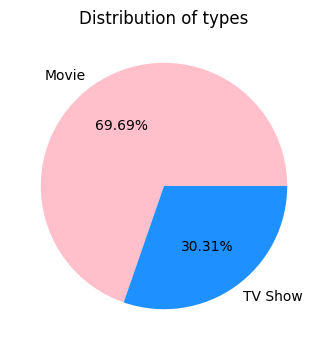

In [ ]:
types = df['type'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(types, labels = types.index,autopct='%1.2f%%', colors = ['#FFC0CB' , '#1E90FF'])
plt.title('Distribution of types')
plt.show()

There are almost 70% movies and 30% TV shows on Netflix



---



How has the number of Movies and TV Shows added on  netflix per year changed over the years?

In [ ]:
d = df.groupby(['Year', 'type'])['show_id'].count().reset_index() #Count the number of shows for each group of Year and type

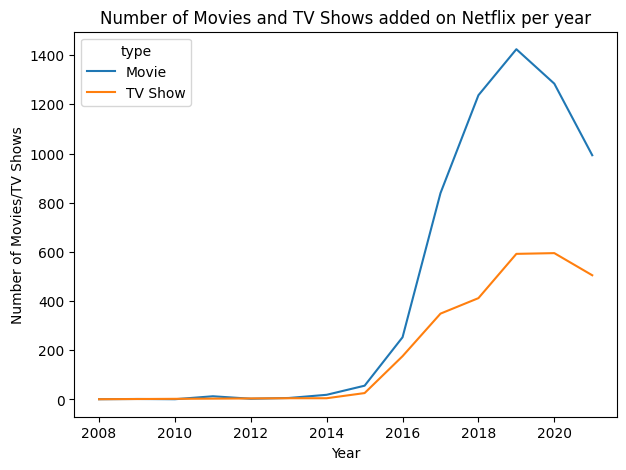

In [ ]:
plt.figure(figsize=(7, 5)) #Select the figure size
sns.lineplot(x='Year', y='show_id', hue='type', data=d) #Create a line plot with year on the x-axis and counts on the y-axis, differentiated by type
plt.xlabel('Year') #Label the x-axis
plt.ylabel('Number of Movies/TV Shows') #Number of Movies and TV Shows released per year as label of y-axis
plt.title('Number of Movies and TV Shows added on Netflix per year') #Set the title
plt.show() #show the chart

**Overall Trend:**

   Both movies and TV shows exhibit rapid growth in the number of additions, peaking around 2018 for movies and 2019 for TV shows.

**Comparison Between Movies and TV Shows:**

---



*  The number of movies added per year on Netflix consistently outpaces the number of TV shows added throughout the observed period.
*   The gap between the number of movies and TV shows widens significantly between 2016 and 2018, indicating a stronger push for movie content during these years.
*   Both movies and TV shows experience a peak followed by a decline, suggesting common influencing factors affecting both types of content.

How has the number of movies released per year changed over the last 20-30 years?



In [ ]:
d = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()

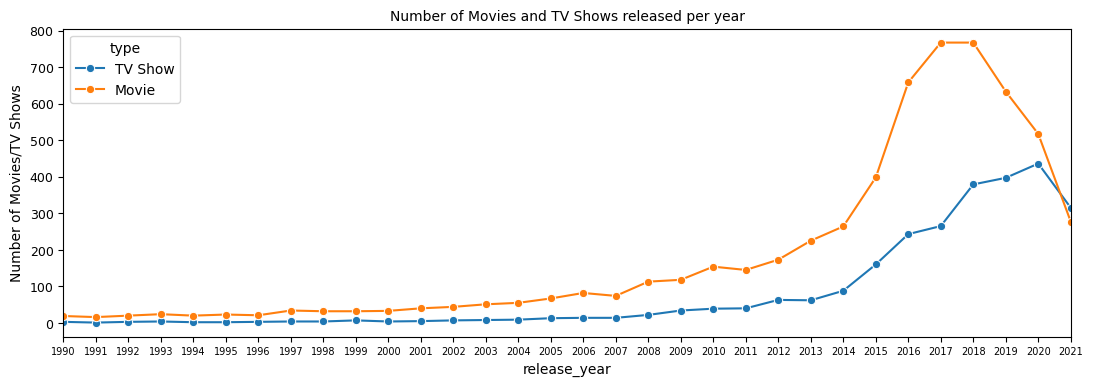

In [ ]:
plt.figure(figsize=(13, 4)) #Select the figure size
sns.lineplot(x='release_year', y='show_id', marker = 'o', ms= 6,  hue='type', data=d) #Create a line plot with year on the x-axis and counts on the y-axis, differentiated by type
plt.xlabel('release_year', fontsize= 10) #Label the x-axis
plt.ylabel('Number of Movies/TV Shows') #Number of Movies and TV Shows released per year as label of y-axis
plt.title('Number of Movies and TV Shows released per year', fontsize = 10) #Set the title


plt.xlim(left=1990, right=2021) #Set the x-axis limits to focus from 90s

plt.xticks(np.arange(1990, 2022, 1), fontsize = 7) # Set x-axis ticks for every year from 1990 to 2021
plt.yticks(fontsize = 9)
plt.show() #show the chart

**Long-Term Trends:**

*   From 1990 to around 2007, the number of movies and TV shows released each year remained relatively stable with modest increases.
*   After 2007, there is a noticeable upward trend in both movies and TV shows, with a particularly sharp increase starting around 2013.

**Comparison Between Movies and TV Shows:**

*   Throughout the period from 1990 to 2021, movie releases have consistently outnumbered TV show releases.
*   The gap between the number of movies and TV shows started to widen significantly from around 2013 to 2017, indicating a stronger growth in movie releases during this period.
*   Both movies and TV shows exhibit a peak followed by a decline, although the peak years differ slightly (2017 for movies and 2019 for TV shows).



---



Number of movies/TV Shows directed by the directors

---



In [ ]:
top_10_dir = dir_2.groupby('director')['show_id'].count().sort_values(ascending = False)[0:10].reset_index()
top_10_dir

,director,show_id
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12


In [ ]:
plt.figure(figsize=(7, 5)) #set the figure size

#create a bar plot with pastel-colored bars for each director, using the count of 'show_id' for the x-axis, and disable the legend
sns.barplot(data=top_10_dir, y='director', x='show_id')

# Customize the plot
plt.title('Total Movies and TV Shows by Director', fontsize = 10)
plt.xlabel('Movies/TV Shows Count')
plt.ylabel('Directors')
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

NameError: name 'plt' is not defined

*   Rajiv Chilaka stands out as the most prolific director, having directed 19 movies and TV shows.
High Output Directors:
*   Jan Suter, Raúl Campos, Suhas Kadav, and Marcus Raboy follow closely, each directing between 16 to 18 titles, indicating their significant contribution to the content library.
*   Jay Karas and Cathy Garcia-Molina have directed 14 and 13 titles respectively, marking them as consistent contributors with a notable presence.
Renowned Directors:
*   Prominent directors like Martin Scorsese and Steven Spielberg, although having directed slightly fewer titles (11-12), highlight the presence of high-quality, impactful productions within the library.

Checking for outliers in the top directors by total movies/TV Shows

---



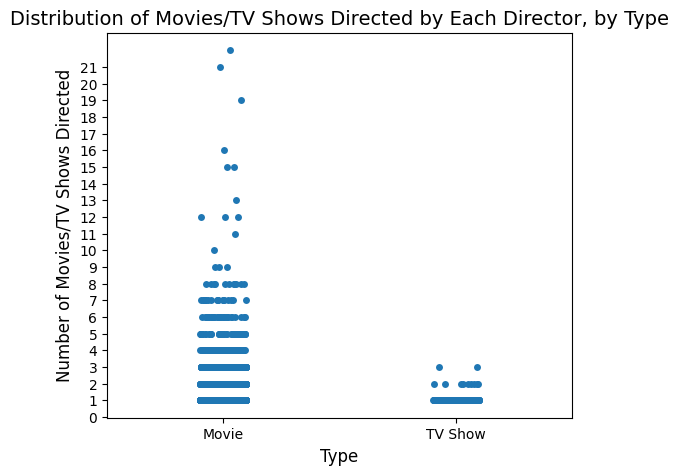

In [ ]:
director_type_counts = dir_2.groupby(['director', 'type']).size().reset_index(name='count')

# Set the size of the plot for better visibility
plt.figure(figsize=(6, 5))

# Create a scatter plot to visualize the distribution of director counts, separated by type
sns.stripplot(data=director_type_counts, x='type', y='count', jitter=True)

# Set the labels and title of the plot
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Movies/TV Shows Directed', fontsize=12)
plt.yticks(np.arange(0, 22, 1))
plt.title('Distribution of Movies/TV Shows Directed by Each Director, by Type', fontsize=14)

# Display the plot
plt.show()

*   The scatter plot reveals that the majority of directors have directed only one movie or TV show, highlighting a significant skew towards single productions.
*   Outliers for movies are evident, with several directors having directed over 10 movies, and one notable director reaching up to 21 movies.
*   In contrast, TV shows exhibit fewer outliers, with the highest count being around 7 shows directed by a single director. This indicates a broader distribution of directing efforts in movies compared to TV shows, where fewer directors take on multiple projects.



---



Top 10 Actors/Cast with the Most Appearances on Netflix

---



In [ ]:
#finding the top 10 actors on the basis of number of movies/TV shows they appeared in, on Netflix
top_10_actors = cast_2.groupby('cast')['show_id'].count().sort_values(ascending = False)[0:10].reset_index()
top_10_actors

,cast,show_id
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Om Puri,30
7,Akshay Kumar,30
8,Yuki Kaji,29
9,Paresh Rawal,28


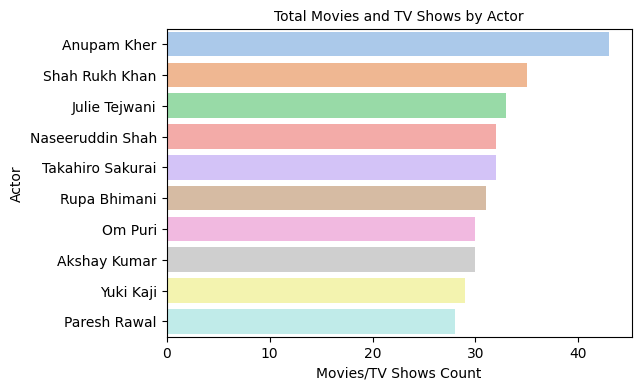

In [ ]:
plt.figure(figsize=(6, 4)) #set the figure size

#create a bar plot with pastel-colored bars for each cast, using the count of 'show_id' for the x-axis, and disable the legend
sns.barplot(data=top_10_actors, y='cast', x='show_id', palette='pastel',hue='cast', legend=False)

# Customize the plot
plt.title('Total Movies and TV Shows by Actor', fontsize = 10)
plt.xlabel('Movies/TV Shows Count')
plt.ylabel('Actor')
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

*   Anupam Kher has the highest count of movies and TV shows, significantly ahead of the other actors with around 40 appearances. This indicates his strong presence and popularity in the industry.
*   Shah Rukh Khan, Julie Tejwani, and Naseeruddin Shah follow Anupam Kher with 30 to 35 appearances each.
*   The list includes a diverse range of actors from different backgrounds and specialties, such as Takahiro Sakurai from the anime industry and Bollywood stars like Om Puri and Akshay Kumar. This diversity highlights the varied audience preferences

Total movies/TV Shows by country

---



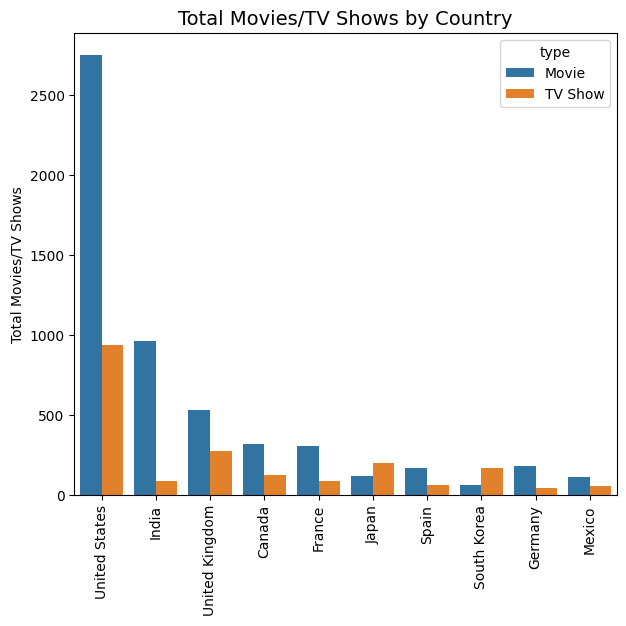

In [ ]:
top_10_country = country_2['country'].value_counts().head(10).index

# Filter the DataFrame for these top 10 countries
df_top_10 = country_2[country_2['country'].isin(top_10_country)]

# Group by country and type, then count the number of movies and TV shows
country_counts = df_top_10.groupby(['country', 'type']).size().reset_index(name='count')

# Pivot the table to have separate columns for movies and TV shows
country_counts_pivot = country_counts.pivot(index='country', columns='type', values='count').fillna(0)

# Plot the results
plt.figure(figsize=(7, 6))

# Define custom colors for the plot
palette_colors = {'Movie': '#1f77b4', 'TV Show': '#ff7f0e'}

# Create a count plot with the country on the x-axis, segmented by type (Movie/TV Show), using custom colors
sns.countplot(data=df_top_10, x='country', hue='type', palette=palette_colors, order=top_10_country)

# Customize the appearance of the plot
plt.xticks(rotation=90, fontsize=10)  # Rotate the x-axis labels for better readability
plt.ylabel('Total Movies/TV Shows', fontsize=10)
plt.xlabel('')
plt.title('Total Movies/TV Shows by Country', fontsize=14)
plt.show()

*   The data reveals that the United States is the leading producer of content, encompassing both movies and TV shows.
*   Following the US, India, the United Kingdom, and Canada are significant contributors.
*   While India ranks second overall in movie production, its TV show output is surpassed by countries like the United Kingdom and South Korea.

<ipython-input-74-cdd438b32701>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=moviess, y='listed_in', palette='viridis', linewidth=0.2, edgecolor=".2", saturation=0.75, order=top_10_movie_genres)


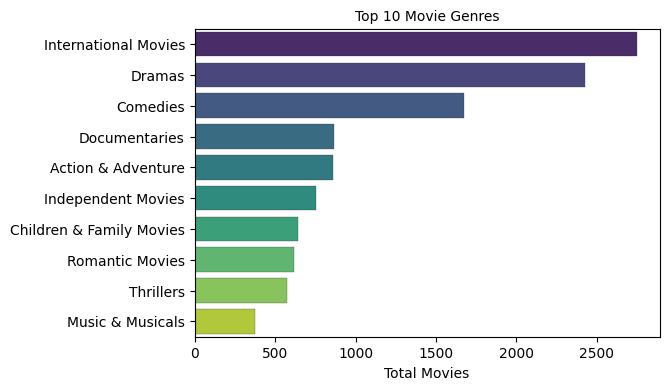

In [ ]:
top_10_movie_genres = listed_2[listed_2['type'] == 'Movie'].listed_in.value_counts().head(10).index
# Filter the DataFrame for only those movies in the top 10 genres
moviess = listed_2.loc[listed_2['listed_in'].isin(top_10_movie_genres)]
plt.figure(figsize=(6, 4))

# Create a count plot with pastel colors for each genre
sns.countplot(data=moviess, y='listed_in', palette='viridis', linewidth=0.2, edgecolor=".2", saturation=0.75, order=top_10_movie_genres)

# Customize the appearance of the plot
plt.xlabel('Total Movies')
plt.ylabel('')
plt.title('Top 10 Movie Genres', fontsize=10)
plt.show()

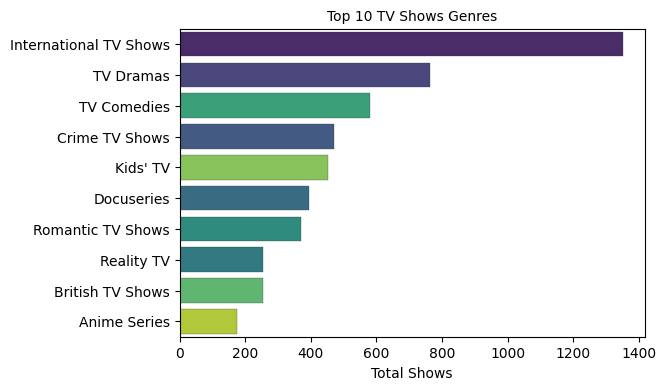

In [ ]:
top_10_show_genres = listed_2[listed_2['type'] == 'TV Show'].listed_in.value_counts().head(10).index
# Filter the DataFrame for only those movies in the top 10 genres
shows = listed_2.loc[listed_2['listed_in'].isin(top_10_show_genres)]
plt.figure(figsize=(6, 4))

# Create a count plot with pastel colors for each genre
sns.countplot(data=shows, y='listed_in', hue='listed_in', palette='viridis', linewidth=0.2, edgecolor=".2", saturation=0.75, order=top_10_show_genres)

# Customize the appearance of the plot
plt.xlabel('Total Shows')
plt.ylabel('')
plt.title('Top 10 TV Shows Genres', fontsize=10)
plt.show()

Total movies/TV shows distribution by duration of the content

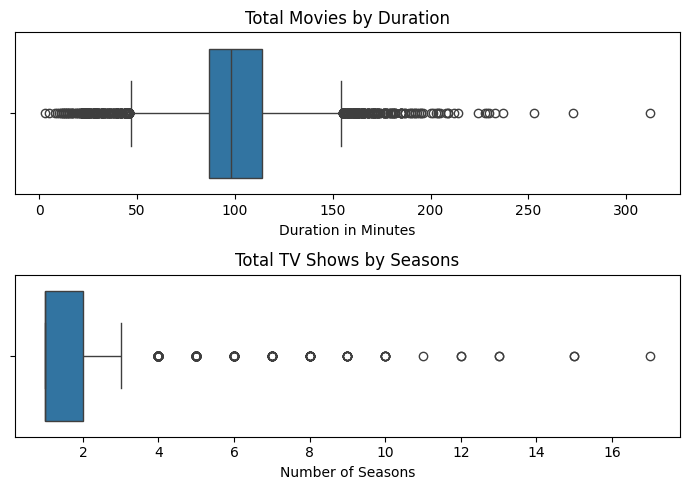

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(7, 5))

# Boxplot for movie durations in minutes
sns.boxplot(data=movies, x='duration', ax=ax[0])
ax[0].set_xlabel('Duration in Minutes', fontsize=10) # Set x-axis label with a
ax[0].set_title('Total Movies by Duration') # Title for the first plot

# Boxplot for TV show durations in seasons
sns.boxplot(data=tv_shows, x='seasons', ax=ax[1])
ax[1].set_xlabel('Number of Seasons', fontsize=10) # Set x-axis label with a␣ font size of 12
ax[1].set_title('Total TV Shows by Seasons')
plt.tight_layout()
# Display the plot
plt.show()

Avg. Movie Duration: 50-150 mins - Avg. TV Show Duration: 1-3 seasons

Popular genres in top 10 countries

---



In [ ]:
top_10_countries = country_2['country'].value_counts().head(10).index # Find the top 10 countries
# Filter the DataFrame to only include the top 10 countries
df_top_countries = country_2.loc[country_2['country'].isin(top_10_countries)]

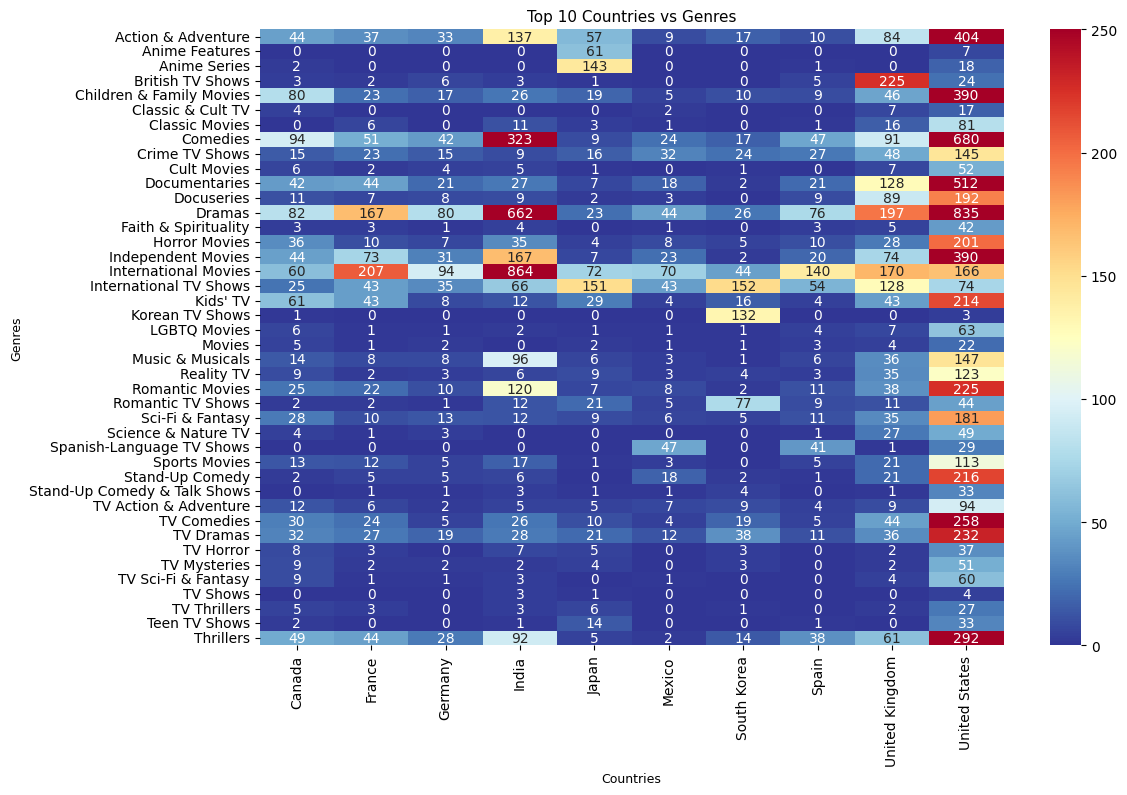

In [ ]:
merged = df_top_countries.merge(listed_2, on='show_id').drop_duplicates() # Merge the dataframes on 'show_id' and drop duplicates
genre_counts = merged.groupby(['country', 'listed_in'])['show_id'].count().sort_values(ascending=False).reset_index() # Count the occurrences of each genre in each country

genre_pivot = genre_counts.pivot(index='listed_in',columns='country', values='show_id').fillna(0) # Pivot the table to have separate columns for each country

# Create a heatmap to visualize popular genres in the top 10 countries

plt.figure(figsize=(12, 8)) # Set the figure size
sns.heatmap(data=genre_pivot, cmap='RdYlBu_r', annot=True, fmt=".0f", vmin=0, vmax=250)
plt.xlabel('Countries', fontsize=9) # Set x-axis label
plt.ylabel('Genres', fontsize=9) # Set y-axis label
plt.title('Top 10 Countries vs Genres', fontsize=11) # Set the title of the heatmap

# Display the heatmap
plt.show()

*   In the USA, the top genres include Action and Adventure, Family Movies, Comedies, Documentaries, Dramas, Independent Films, International TV Shows, Romantic Films, Stand-up Comedy, TV Comedies, TV Dramas, and Thrillers. Meanwhile, in India, popular genres encompass International Films, Dramas, and Comedies.



---



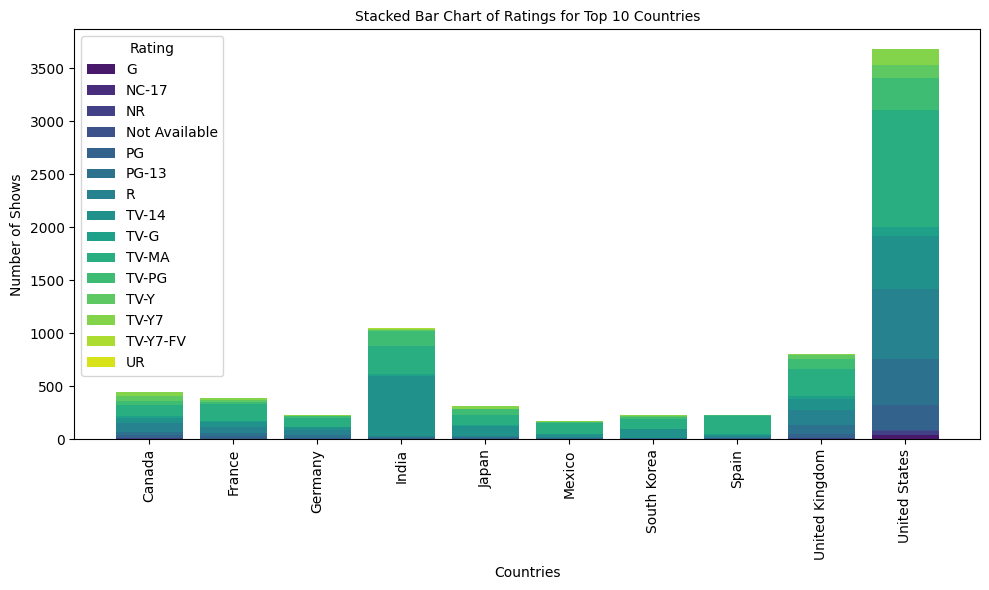

In [ ]:
df_top_10_countries = country_2[country_2['country'].isin(top_10_countries)] # Filter the DataFrame for the top 10 countries

merged = df_top_10_countries.merge(df, on='show_id') # Merge the dataframes on 'show_id'

country_rating_counts = merged.groupby(['country_x', 'rating'])['show_id'].count().reset_index() # Count the occurrences of each rating in each country

rating_country_pivot = country_rating_counts.pivot(index='country_x', columns='rating', values='show_id').fillna(0) # Pivot the table to have separate columns for each rating

# Create a stacked bar chart to visualize the distribution of ratings for each country

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

colors = sns.color_palette('viridis', len(rating_country_pivot.columns))  # Set the colors for the bars

# Plot each rating category as a stacked bar for each country
bottom = None
for i, rating in enumerate(rating_country_pivot.columns):
    plt.bar(rating_country_pivot.index, rating_country_pivot[rating], label=rating, bottom=bottom, color=colors[i])
    if bottom is None:
        bottom = rating_country_pivot[rating].values
    else:
        bottom += rating_country_pivot[rating].values

plt.xlabel('Countries')  # Set x-axis label
plt.ylabel('Number of Shows')  # Set y-axis label
plt.title('Stacked Bar Chart of Ratings for Top 10 Countries', fontsize = 10)  # Set the title of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Rating', loc='upper left')  # Add legend with rating categories
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

*   In the USA, the top-rated classifications include: TV-MA, R, TV-14, PG-13, TV-PG, and PG. In India, the prevalent categories are TV-14 and TV-MA.

In [ ]:
merged_data = listed_2.merge(country_2, on='show_id').drop_duplicates()
# Group the merged data by country and genre, then count the number of shows for each genre in each country
genre_country_counts = merged_data.groupby(['country', 'listed_in'])['show_id'].count().reset_index()

country_list = ['United States', 'India', 'United Kingdom']

Top 5 genres in each country

---



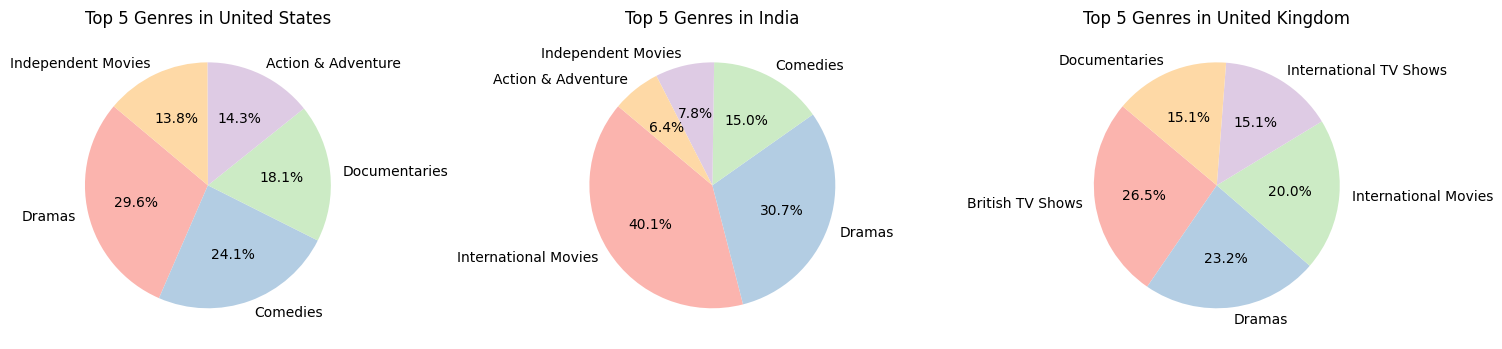

In [ ]:
plt.figure(figsize=(15, 6))

# Iterate over each country in the list
for i, country in enumerate(country_list):
    # Subset data for the current country
    data_country = genre_country_counts[genre_country_counts['country'] == country]
    # Sort by show_id in descending order to get top genres
    data_country = data_country.sort_values(by='show_id', ascending=False).head(5)

    # Plotting
    plt.subplot(1, 3, i+1)
    plt.pie(data_country['show_id'], labels=data_country['listed_in'], autopct='%1.1f%%', startangle=140, colors= plt.cm.Pastel1.colors)
    plt.title(f'Top 5 Genres in {country}')

plt.tight_layout()
plt.show()

Variation in Duration of Movies by Release Year

---



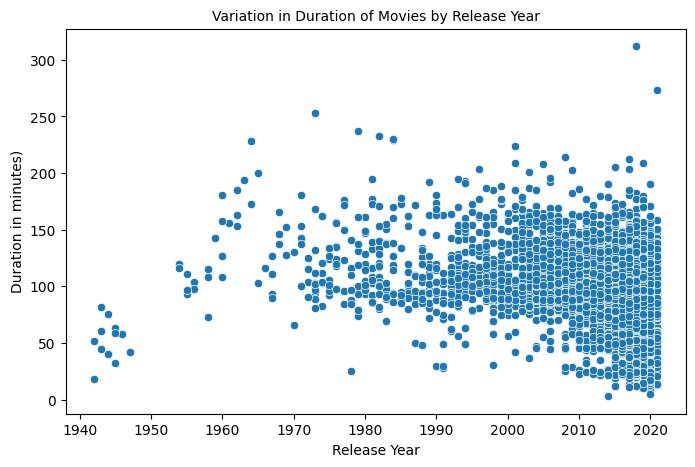

In [ ]:
plt.figure(figsize=(8, 5)) # Set the figure size
sns.scatterplot( y='duration', x='release_year',data=movies) # Create a scatter plot with 'release_year' on the x-axis and 'duration' on the y-axis
plt.title('Variation in Duration of Movies by Release Year', fontsize = 10) # Set the title of the plot
plt.xlabel('Release Year') # Set the x-axis label
plt.ylabel('Duration in minutes)') #Set the y-axis label
plt.show() # Display the plot

*   During the 1960s and 1970s, movies were typically longer, but in recent years, most films range from 75 to 150 minutes.
*   Since 2000, there has been a significant increase in the number of movies under 150 minutes, while films exceeding this duration have become less common.
*   Notably, there has been a substantial rise in the number of short films (under 75 minutes) after 2010. Overall, shorter movies have gained popularity in the last decade.

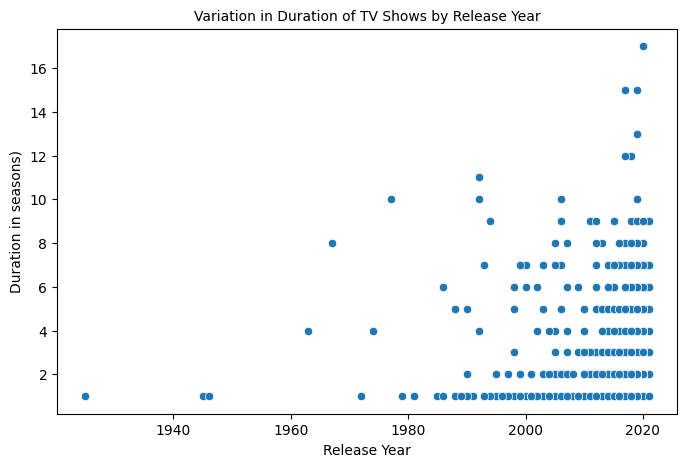

In [ ]:
plt.figure(figsize=(8, 5)) # Set the figure size
sns.scatterplot( y='seasons', x='release_year',data=tv_shows) # Create a scatter plot with 'release_year' on the x-axis and 'duration' on the y-axis
plt.title('Variation in Duration of TV Shows by Release Year', fontsize = 10) # Set the title of the plot
plt.xlabel('Release Year') # Set the x-axis label
plt.ylabel('Duration in seasons)') #Set the y-axis label
plt.show() # Display the plot

Most of the TV shows are just 1-3 seasons



---



In [ ]:
month_year = df.groupby(['Year', 'Month'])['show_id'].count().reset_index() # Group the data by year and month, and count the number of shows for each group
avg_monthly_additions = month_year.groupby('Month')['show_id'].sum().reset_index() # Calculate the average number of additions per month

# Convert 'Month' from numbers to month names to make the plot more readable
avg_monthly_additions['Month'] = pd.to_datetime(avg_monthly_additions['Month'], format='%m').dt.strftime('%b')

# Sort the data by month to follow the calendar order
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_monthly_additions['Month'] = pd.Categorical(avg_monthly_additions['Month'], categories=months_order, ordered=True)
avg_monthly_additions.sort_values('Month', inplace=True)

avg_monthly_additions

,Month,show_id
0,Jan,738
1,Feb,563
2,Mar,742
3,Apr,764
4,May,632
5,Jun,728
6,Jul,827
7,Aug,755
8,Sep,770
9,Oct,760


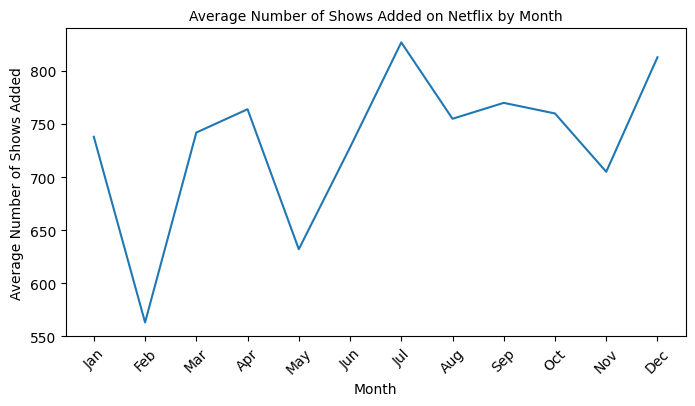

In [ ]:
# Plot the average monthly additions
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_monthly_additions, x='Month', y='show_id')
plt.title('Average Number of Shows Added on Netflix by Month', fontsize= 10)
plt.xlabel('Month') # X-axis label
plt.ylabel('Average Number of Shows Added') # Y-axis label
plt.xticks(rotation=45) # Rotate the x-axis labels for readability
# Display the plot
plt.show()

*   
Optimal months for adding content to the Netflix platform are January, April, July, and December.
*   The final quarter of the year, particularly November and December, sees a higher volume of new shows being added compared to other months.
*   This trend might be attributed to the global Christmas holiday season during that period.



---






Which countries are adding more number of content over the time?



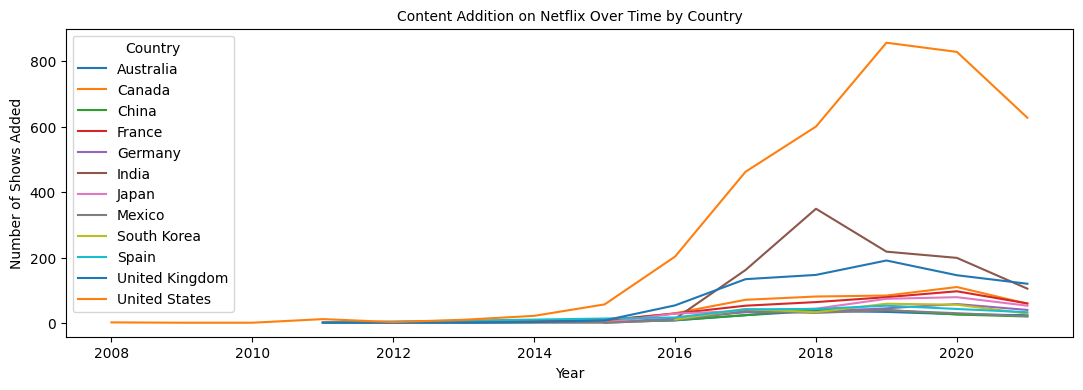

In [ ]:
# Obtain the top 12 countries based on the count of content
country_list = country_2.country.value_counts().head(12).index


top_12_country = country_2.loc[country_2['country'].isin(country_list)] # Filter the DataFrame for the top 12 countries

country_year = top_12_country.merge(df, on='show_id')[['show_id', 'country_x', 'type_x', 'Year']] # Merge the dataframes on 'show_id' and select the desired columns
country_year.columns = ['show_id', 'country', 'type', 'Year'] # Rename the columns for clarity
country_year = country_year.groupby(['country', 'Year'])['show_id'].count().reset_index() # Group the data by country and year, and count the number of shows for each group


plt.figure(figsize=(13, 4))
sns.lineplot(data=country_year, x='Year', y='show_id', hue='country', palette='tab10')

plt.title('Content Addition on Netflix Over Time by Country', fontsize = 10) # Set the title of the plot

plt.xlabel('Year') # Set the x-axis label
plt.ylabel('Number of Shows Added') # Set the y-axis label


plt.legend(title='Country', loc='upper left') # Add a legend to the plot
# Show the resulting line plot
plt.show()

*   United Stated have always added highset number of movies/TV shows over the time.
*    Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.



---



---



# **Analysis of Netflix Content**

---

- **Content Distribution**: The majority of Netflix's library consists of movies, making up about 70% of the total content. TV shows make up the remaining 30%, highlighting a strong preference for feature films over series.

- **Content Growth Over Time:** Netflix's content growth began in 2008, with a steady increase until 2014. A major surge in content additions started in 2015, marking a critical period for the platform's expansion.

- **Year of Maximum Additions:** In 2019, Netflix added the highest number of new movies and TV shows, demonstrating a peak in its content expansion efforts.

- **Pandemic Effects:** The years 2020 and 2021 saw a significant drop in new content additions, likely due to production delays caused by the COVID-19 pandemic. The decline was more pronounced in movie uploads, while TV shows were less affected.

- **Evolving Content Trends:** Since 2018, there has been a noticeable decline in movie uploads and a rise in TV show productions. By mid-2020, the number of TV shows on Netflix surpassed that of movies, indicating a shift in viewer preference towards serialized content.

- **Director Diversity**: Netflix includes works from approximately 4,993 directors, demonstrating the platform’s extensive range of directorial voices and commitment to diverse creative perspectives.

- **Global Content Sources:** Netflix features content from 122 countries, with the United States contributing the most, nearly 37% of the total content available.

- **Release Year Focus:** Most content on Netflix was released between 2005 and 2021, indicating a focus on contemporary films and recent productions.

- **TV Show Durations:** Most TV shows on Netflix span between 1 and 3 seasons, suggesting a preference for shorter series on the platform.

- **Content Ratings Variety:** Netflix offers a wide range of content ratings to cater to different audiences, with TV-MA being the most prevalent rating, intended for mature viewers.

- **Regional Rating Availability:** Apart from the US, certain content ratings (such as TV-Y7, TV-Y7 FV, PG, TV-G, G, TV-Y, TV-PG) are less commonly available, indicating regional differences in content ratings and availability.

- **Popular Genres:** The leading genres on Netflix, including both movies and TV shows, are International Movies and TV Shows, Dramas, and Comedies, showcasing the platform’s genre diversity.

- **Cultural Genre Preferences:** Each country on Netflix features genres that resonate with its cultural preferences. For instance, Korean dramas are popular in Korea, British TV shows in the UK, and Anime in Japan, while the US offers a varied genre mix.

- **Prominent Indian Actors:** Indian actors are highly featured on Netflix, with the top five most prolific actors by the number of movies being from India, highlighting the significant contribution of Indian cinema.

# **Strategic Insights**

---



1. **Content Release Timeline**: The majority of content available on Netflix has been released
after the year 2000, with a noticeable scarcity of content released prior to this year. This presents an opportunity to target senior citizens, a demographic that may value classic films
and shows, which are currently underrepresented on the platform.

2. **Audience Demographics and Ratings**: A significant portion of Netflix's content (over 80%) is rated for mature audiences:
- TV-MA (Mature Audiences): Content intended for viewers aged 17 and above.
- TV-14 (Teens and Above): Content suitable for viewers aged 14 and above.
- TV-PG and similar ratings (PG-13, PG): Content suggesting parental guidance.
- R (Restricted): Content that may not be suitable for viewers under age 17.

These ratings indicate a strategic focus on catering to mature and adult audiences, with a smaller but significant portion of content (approximately 20%) aimed at children under 13, often requiring parental guidance.

3. **Genre Popularity**: The most popular genres on Netflix include International Movies and TV Shows, Dramas, Comedies, Action & Adventure, Children & Family Movies, and Thrillers.
This diversity supports a broad appeal, catering to a wide range of tastes and preferences across its global audience.

4. **Geographic Content Distribution**: Approximately 75% of Netflix's content originates from the top 10 contributing countries. This concentration suggests that while Netflix has a
strong base in these regions, expanding focus to include more diverse countries could enhance global reach and appeal, potentially opening up new markets.

5. **Content Duration Preferences**: There is a growing preference for shorter duration content, typically ranging from 75 to 150 minutes for movies and 1 to 3 seasons for TV shows.
This trend should be considered in the production of new content, as it aligns with current viewer habits and preferences.

6. **Impact of the Pandemic on Content Addition**: A decline in the volume of content added in 2020 and 2021 across all countries and content types was observed, likely due to production halts and other disruptions caused by the COVID-19 pandemic. This downturn underscores the need for adaptive content strategies that can accommodate such disruptions.


# **Recommendations:**

- **Expand Classic Content Library**: With a current focus predominantly on content released post-2000, Netflix has an opportunity to attract a broader audience, including senior citizens, by incorporating more classic films and TV shows from before the year 2000. This could fill a niche market segment that is currently underserved.

- **Diversify Geographic Content**: While a significant portion of content comes from the top 10 countries, Netflix should consider increasing the diversity of content from other regions. This expansion would not only cater to a global audience but also differentiate Netflix from competitors by offering unique and culturally diverse programming.

- **Enhance Children and Family-Friendly Offerings**: Given that a substantial amount of content is aimed at mature audiences, Netflix could increase its portfolio of children's and family-
oriented programming. This would not only cater to families but also balance the content slate to
include viewers of all ages.

- **Short-Form Content Development**: Reflecting the trend toward shorter content formats, Netflix could invest more in short films, limited series, and short episodic content that caters to
viewers with limited viewing time. This would appeal to a younger demographic that prefers quick
and engaging content.

- **Respond to Pandemic-Induced Viewing Habits**: Recognizing the impact of the pandemic on production and content delivery, Netflix could develop more in-house productions that adhere
to safe filming protocols and explore themes relevant to current global experiences, such as social distancing and personal reflection.

- **Leverage Data for Localized Content Creation**: Utilize viewing data and analytics to understand regional preferences and produce localized content that resonates with specific cultural tastes and trends. This targeted approach can significantly increase viewer engagement and satisfaction.

- **Invest in Genre Expansion**: While maintaining strength in popular genres like dramas and comedies, Netflix should also explore and possibly invest in underrepresented genres or those showing emerging popularity trends. For instance, enhancing offerings in sci-fi, fantasy, or non-fiction could attract new subscribers.

- **Promote and Expand R-rated and TV-MA Content**: Given the high consumption rates of TV-MA and R-rated content, continue to develop and promote new content in these categories
while ensuring it is balanced with offerings appropriate for all ages.

- **Sustainable Production Practices**: As the industry moves towards more environmentally friendly practices, Netflix could take a leadership role by adopting and promoting sustainable
production practices, which would not only reduce its carbon footprint but also appeal to environmentally conscious consumers.